In [1]:
import pandas as pd
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram

In [2]:
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

from sklearn.datasets import load_iris
iris_data = load_iris(return_X_y=False, as_frame=True)
iris_data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


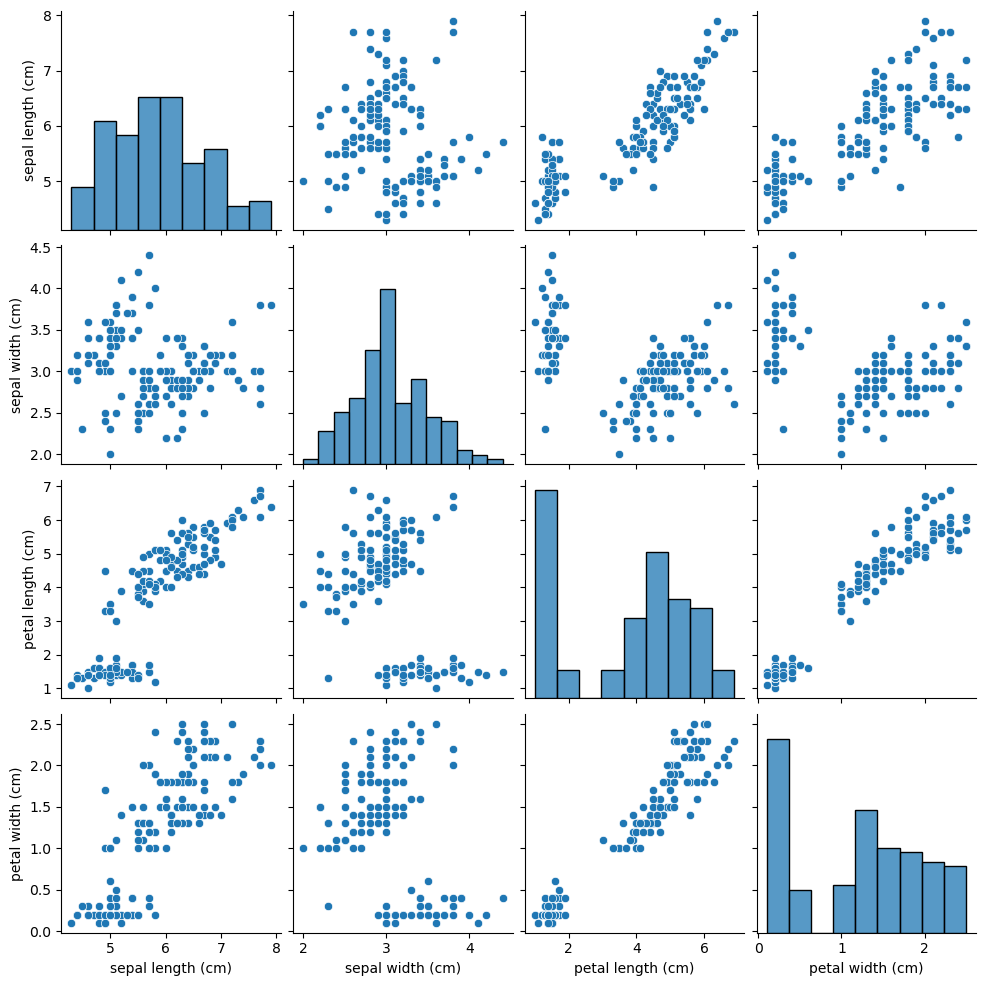

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.pairplot(iris_data.data)
plt.show()

In [4]:
X = iris_data.data
target_labels = iris_data

In [5]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

In [6]:
from hierarchical_clustering import AgglomerativeClustering

In [7]:
%%time
linkage_types = ['ward', 'complete', 'average', 'single']
hclust = dict()
for linkage_type in linkage_types:
    model = AgglomerativeClustering(linkage=linkage_type)
    clustering = model.fit(X)
    hclust[linkage_type] = clustering

CPU times: total: 1.8 s
Wall time: 1.85 s


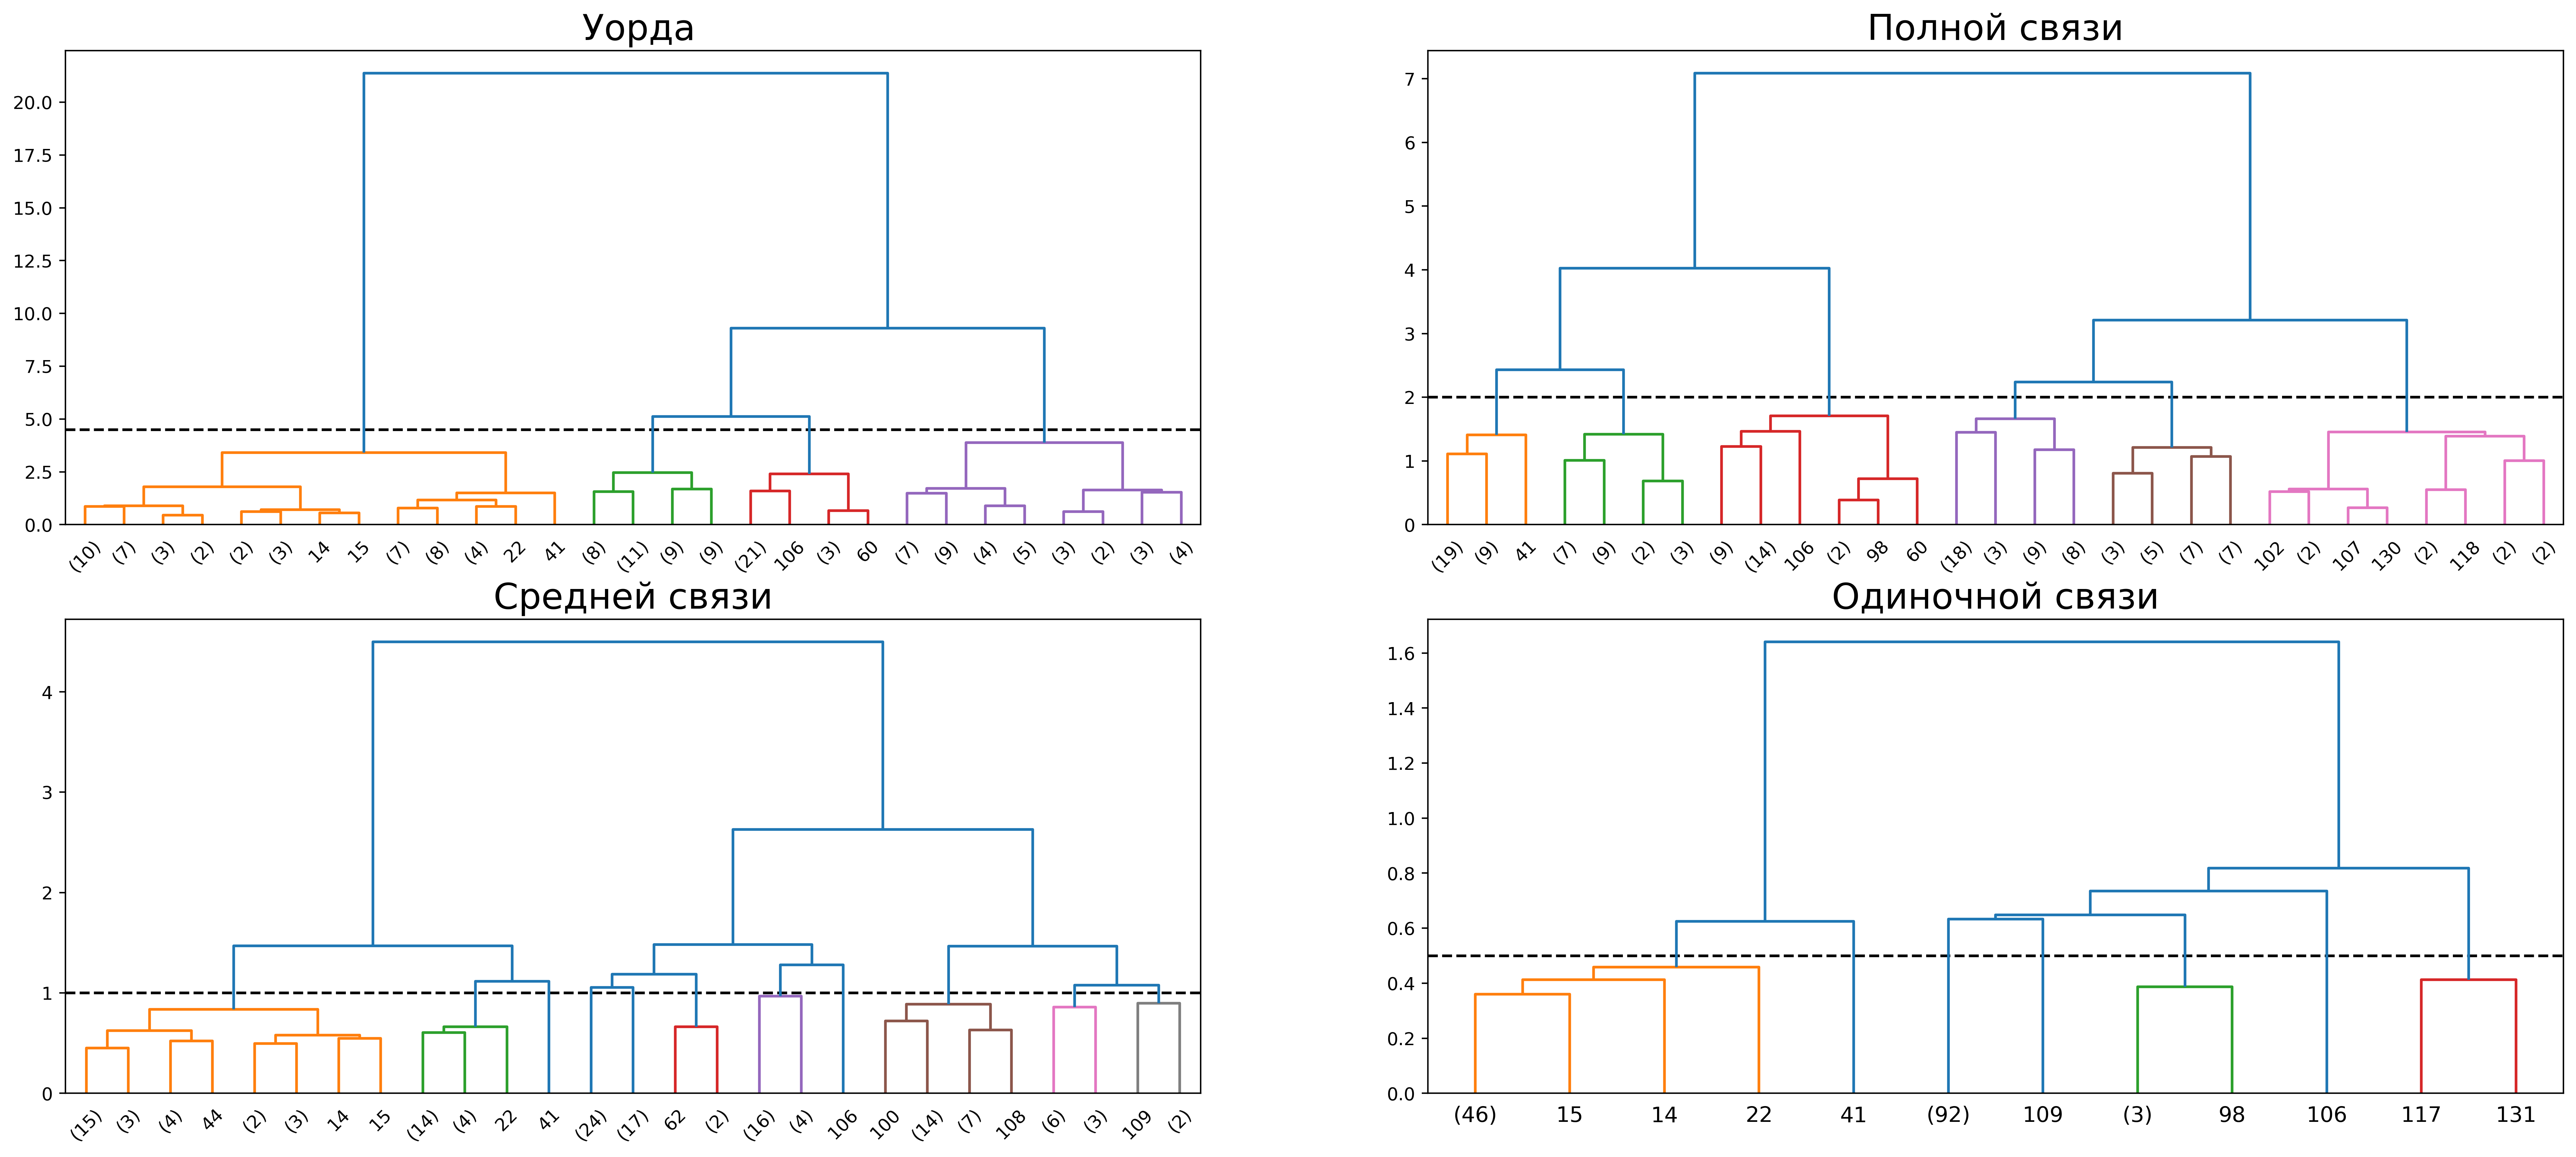

In [8]:
cutoff_thresholds = [4.5, 2, 1, 0.5]
linkage_colors = dict(zip(linkage_types, cutoff_thresholds))
labels = [' Уорда', 'Полной связи', "Средней связи", "Одиночной связи"]
linkage_labels = dict(zip(linkage_types, labels))

mpl.rcParams.update(mpl.rcParamsDefault)
fig, axs = plt.subplots(2, 2)
axs_indices = [(i, j) for i in range(2) for j in range(2)]
for linkage_type, axs_ind in zip(linkage_types, axs_indices):
    axs[axs_ind].set_title(linkage_labels[linkage_type],
                           fontsize=20)
    axs[axs_ind].axhline(y=linkage_colors[linkage_type], linestyle='dashed', color='black')
    linkage_matrix = plot_dendrogram(
        model=hclust[linkage_type],
        truncate_mode="level",
        p=4,
        ax=axs[axs_ind],
        labels=None,
        color_threshold = linkage_colors[linkage_type]
        )

# fig.tight_layout()
fig.set_size_inches(25, 10.5)
fig.set_dpi(400)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering as AC_sklearn

In [10]:
%%time
linkage_types = ['ward', 'complete', 'average', 'single']
hclust_sklearn = dict()
for linkage_type in linkage_types:
    model = AC_sklearn(linkage=linkage_type, n_clusters=None,
                                    distance_threshold=0,
                                    compute_distances=True)
    clustering = model.fit(X)
    hclust_sklearn[linkage_type] = clustering

CPU times: total: 31.2 ms
Wall time: 19.1 ms


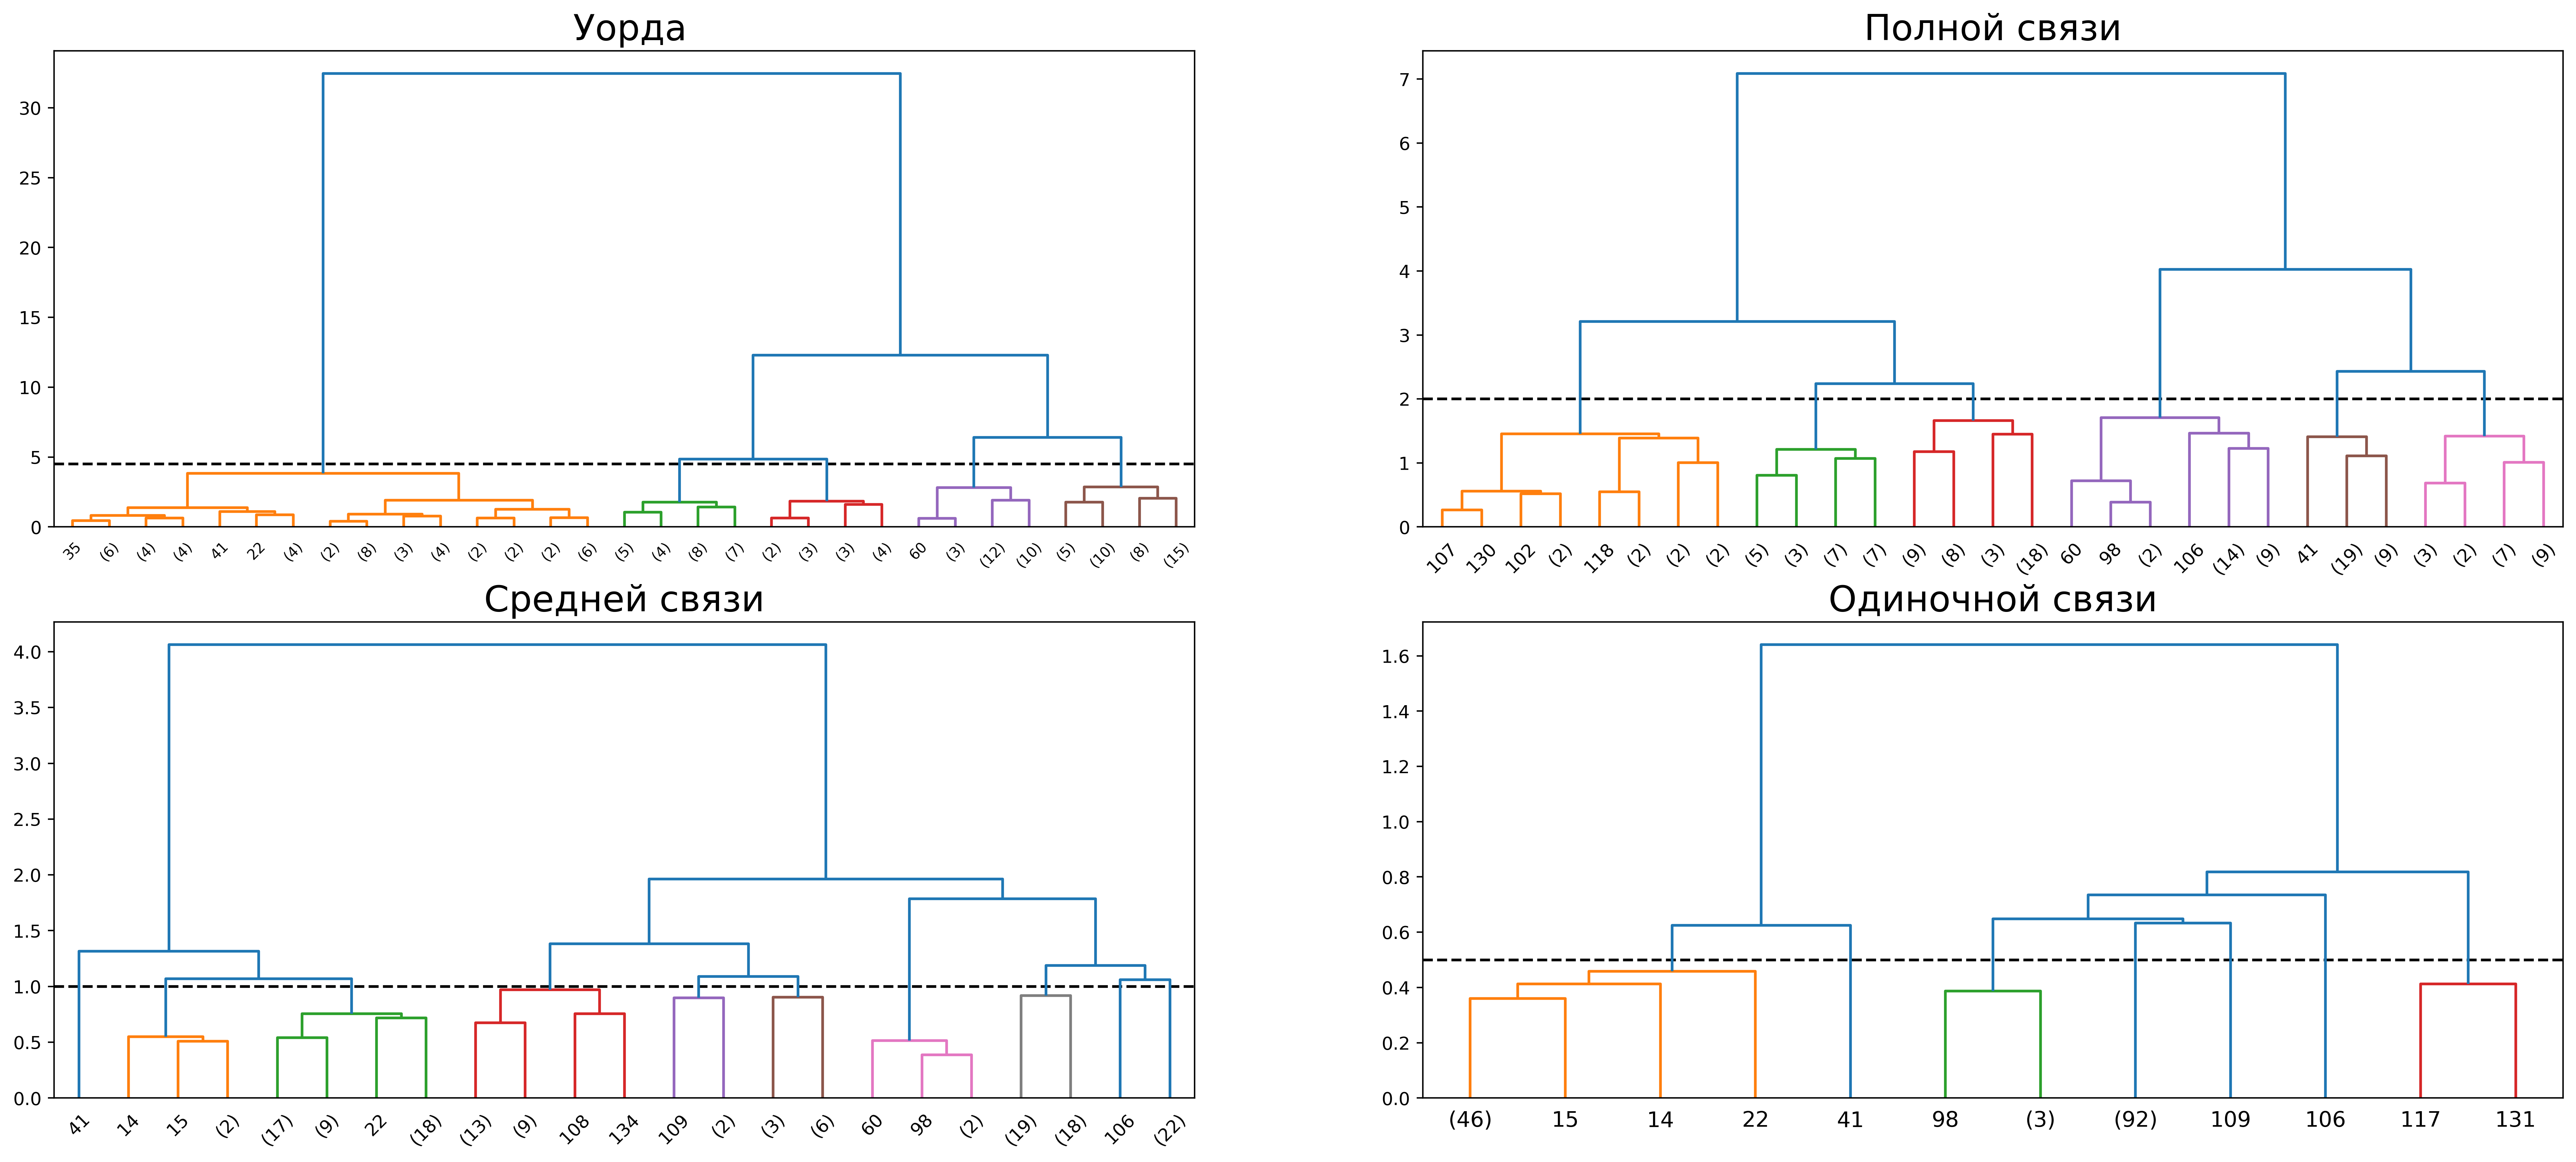

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, axs = plt.subplots(2, 2)
axs_indices = [(i, j) for i in range(2) for j in range(2)]
for linkage_type, axs_ind in zip(linkage_types, axs_indices):
    axs[axs_ind].set_title(linkage_labels[linkage_type],
                           fontsize=20)
    axs[axs_ind].axhline(y=linkage_colors[linkage_type], linestyle='dashed', color='black')
    linkage_matrix = plot_dendrogram(
        model=hclust_sklearn[linkage_type],
        truncate_mode="level",
        p=4,
        ax=axs[axs_ind],
        labels=None,
        color_threshold = linkage_colors[linkage_type]
        )

# fig.tight_layout()
fig.set_size_inches(25, 10.5)
fig.set_dpi(400)
plt.show()